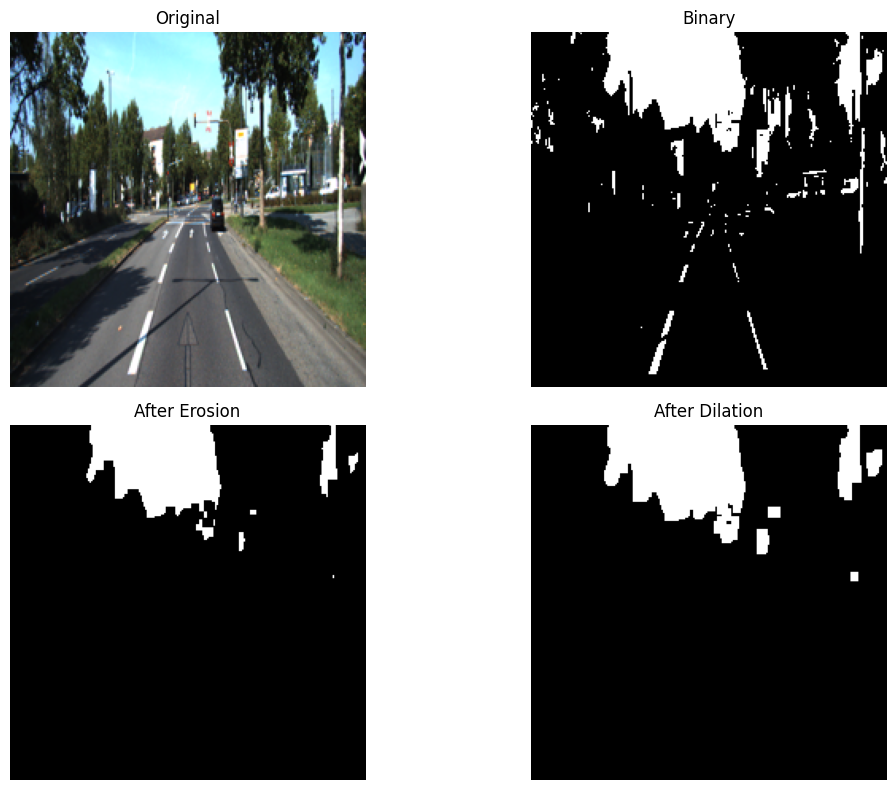

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Load image
# ---------------------------------------------------
img = cv2.imread("lane.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------------------------------------------------
# 2. Convert to grayscale
# ---------------------------------------------------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------------------------------------------------
# 3. Threshold to extract lanes
# ---------------------------------------------------
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# ---------------------------------------------------
# 4. Define structuring kernel
# ---------------------------------------------------
kernel = cv2.getStructuringElement(
    cv2.MORPH_RECT,
    (5,5)
)

# ---------------------------------------------------
# 5. Erosion (remove noise)
# ---------------------------------------------------
eroded = cv2.erode(binary, kernel, iterations=1)

# ---------------------------------------------------
# 6. Dilation (restore lanes)
# ---------------------------------------------------
dilated = cv2.dilate(eroded, kernel, iterations=1)

# ---------------------------------------------------
# 7. Display results
# ---------------------------------------------------
titles = [
    "Original",
    "Binary",
    "After Erosion",
    "After Dilation"
]

images = [
    img_rgb,
    binary,
    eroded,
    dilated
]

plt.figure(figsize=(12,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
